In [1]:
#importing all the important libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\randh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\randh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
nltk.download('wordnet') #English corpous

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\randh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\randh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
#reading the data from the csv files and checking whether the data is loaded or not
data0=pd.read_csv("D:\\D DRIVE BACKUP\\Semester 6\\NLP\\Project\\Twitter_text_class.csv")
data0.head()

,tag,content
0,natural,"b'Hey @jack, would be great if you could go an..."
1,sports,b'RT @Mustafiz90: We are all set for first ODI...
2,politics,b'HPM #SheikhHasina has aimed to boost the eco...
3,crime,b'RT @Hammad_Azhar: @am_nawazish The duty stru...
4,sports,b'#AUSvIND #AUSvsIND #AusvIndia #ChhodnaMat \n...


In [9]:
#checking whether the null value is present or not
data0.isnull().sum()

tag        0
content    0
dtype: int64

In [10]:
#remove it if it is present with the help of dropna
data0.dropna()

,tag,content
0,natural,"b'Hey @jack, would be great if you could go an..."
1,sports,b'RT @Mustafiz90: We are all set for first ODI...
2,politics,b'HPM #SheikhHasina has aimed to boost the eco...
3,crime,b'RT @Hammad_Azhar: @am_nawazish The duty stru...
4,sports,b'#AUSvIND #AUSvsIND #AusvIndia #ChhodnaMat \n...
...,...,...
598,sports,b'@euniqueusername @HOUNGOUNGAGNE oh damm more...
599,natural,b'A China-Bangladesh joint venture is going to...
600,politics,b'JP refuses to quit in 145 seats Aggrieved at...
601,natural,b'#CKD is more common in people of south Asian...


In [11]:
#checking the data type of all the columns
data0.dtypes

tag        object
content    object
dtype: object

In [12]:
#get the frqeuency top unique with the help of describe() command
data0.describe()

,tag,content
count,603,603
unique,4,390
top,sports,b'RT @Refugees: \xe2\x80\x9cThey were from our...
freq,234,28


In [13]:
#choose the column features
df=data0[["content","tag"]]
df = df.loc[df["tag"].isin(["natural", "sports", "politics", "crime"])]
print(df['tag'].unique())
print(df)

['natural' 'sports' 'politics' 'crime']
                                               content       tag
0    b'Hey @jack, would be great if you could go an...   natural
1    b'RT @Mustafiz90: We are all set for first ODI...    sports
2    b'HPM #SheikhHasina has aimed to boost the eco...  politics
3    b'RT @Hammad_Azhar: @am_nawazish The duty stru...     crime
4    b'#AUSvIND #AUSvsIND #AusvIndia #ChhodnaMat \n...    sports
..                                                 ...       ...
598  b'@euniqueusername @HOUNGOUNGAGNE oh damm more...    sports
599  b'A China-Bangladesh joint venture is going to...   natural
600  b'JP refuses to quit in 145 seats Aggrieved at...  politics
601  b'#CKD is more common in people of south Asian...   natural
602  b'One killed, over 200 injured in Tabligh Jama...  politics

[603 rows x 2 columns]


In [14]:
#changing the tag which is in the form of the string to decimal number so that it can fit in the models during training
def categorize():
    tag_list=[]
    for i in df["tag"]:
        if(i=="natural"):
            tag_list.append(0)
        
        elif(i=="sports"):
            tag_list.append(1)
            
        elif(i=="politics"):
            tag_list.append(2)
        
        elif(i=="crime"):
            tag_list.append(3)
    return np.array(tag_list)
    
tag_list=categorize()
df["tag"]=categorize()
print(df["tag"])

0      0
1      1
2      2
3      3
4      1
      ..
598    1
599    0
600    2
601    0
602    2
Name: tag, Length: 603, dtype: int32


In [15]:
#importing all the important libraries related to the NLP and Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import string
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [16]:
#splitting the datasets into the training and testing of the datasets
from sklearn.model_selection import train_test_split
X=df["content"]
y=df["tag"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [17]:
def clean_text(text):
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation + '\n'))
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if not token in stop_words]
    # Lemmatize the tokens
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [18]:
# Clean the text data
df['new_content'] = df['content'].apply(clean_text)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['new_content'])
y = df['tag']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

In [20]:
print(X_test)
print(y_pred)

  (0, 65)	0.3196135990636079
  (0, 458)	0.08718440752465986
  (0, 636)	0.23788598059202223
  (0, 765)	0.3010532654379389
  (0, 887)	0.27612106070464193
  (0, 1573)	0.3095564574841775
  (0, 1584)	0.3196135990636079
  (0, 1625)	0.3196135990636079
  (0, 1734)	0.3095564574841775
  (0, 2030)	0.3095564574841775
  (0, 2042)	0.2813785189509882
  (0, 2155)	0.3095564574841775
  (1, 264)	0.09135125636610628
  (1, 349)	0.2865954205386734
  (1, 350)	0.30663494688361653
  (1, 425)	0.30663494688361653
  (1, 458)	0.08880085101058215
  (1, 1443)	0.29251502567248533
  (1, 1453)	0.30663494688361653
  (1, 1471)	0.30663494688361653
  (1, 1501)	0.29913258119785724
  (1, 1638)	0.15502273805977335
  (1, 1938)	0.21783847413960644
  (1, 1965)	0.30663494688361653
  (1, 2260)	0.29251502567248533
  :	:
  (119, 50)	0.23983361054380897
  (119, 405)	0.3308582904908602
  (119, 666)	0.23683417369353085
  (119, 783)	0.27320766722432616
  (119, 963)	0.27320766722432616
  (119, 1108)	0.352135420226599
  (119, 1738)	0.2676

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy of the model is :', accuracy_score(y_test, y_pred))

Accuracy of the model is : 0.8760330578512396


In [22]:
import joblib

In [23]:
joblib.dump(clf,'topic.pkl')

['topic.pkl']

In [24]:
model=joblib.load('topic.pkl')

In [25]:
text="6b RT @trtworld: Bangladesh opposition party says the government has arrested hundreds of its supporters since election dates were announced h\xe2\x80\xa6"
preprocessed_test_input = clean_text(text)
test_vector = vectorizer.transform([preprocessed_test_input])
prediction=model.predict(test_vector)

#now print the label of the text
if(prediction[0]==0):
    print("This tweet has been related to the natural news")
elif(prediction[0]==1):
    print("This tweet has been related to the Sports news")
elif(prediction[0]==2):
    print("This tweet has been related to the politics news")
else:
    print("This tweet has been related to the crime news")

This tweet has been related to the politics news


['6b', 'RT', '@trtworld:', 'Bangladesh', 'opposition', 'party', 'says', 'the', 'government', 'has', 'arrested', 'hundreds', 'of', 'its', 'supporters', 'since', 'election', 'dates', 'were', 'announced', 'hâ\x80¦']


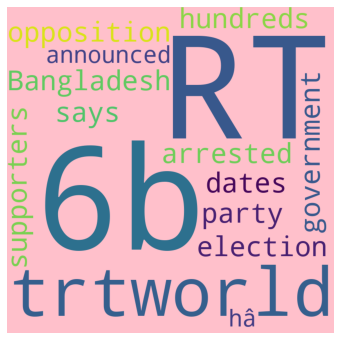

In [26]:
#import the word cloud and the and plot the word  cloud
from wordcloud import WordCloud

#first split the text using the split methods
result_words=text.split()
print(result_words)

final_text=' '.join(result_words)

wordcloud = WordCloud(width=800 ,height=800 ,background_color='pink').generate(final_text)

#plot the word cloud
plt.figure(figsize=(6,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()